In [137]:
#import the neccessary librabries
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing   import OneHotEncoder
from sklearn.compose         import ColumnTransformer
from sklearn.impute          import SimpleImputer
from sklearn.pipeline        import Pipeline
#from catboost                import CatBoostRegressor   # handles cats well
import joblib                # for saving the model


In [138]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("SampleSubmission.csv")
train.fillna(0, inplace = True)
test.fillna(0, inplace = True)

In [139]:
#shape of the data
print(train.shape)
print(test.shape)
print(sample.shape)

(4990, 13)
(3532, 12)
(3532, 2)


In [140]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,0,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,0,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [141]:
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,0,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,0,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [142]:
sample.head()

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,100
1,DRA59_BABATUNJI013,100
2,DRB01_BABATUNJI013,100
3,DRB13_BABATUNJI010,100
4,DRB13_BABATUNJI013,100


In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4990 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           4990 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [144]:
train.count()

Item_ID                4990
Store_ID               4990
Item_Store_ID          4990
Item_Weight            4990
Item_Sugar_Content     4990
Item_Visibility        4990
Item_Type              4990
Item_Price             4990
Store_Start_Year       4990
Store_Size             4990
Store_Location_Type    4990
Store_Type             4990
Item_Store_Returns     4990
dtype: int64

In [145]:
train.dtypes

Item_ID                 object
Store_ID                object
Item_Store_ID           object
Item_Weight            float64
Item_Sugar_Content      object
Item_Visibility        float64
Item_Type               object
Item_Price             float64
Store_Start_Year         int64
Store_Size              object
Store_Location_Type     object
Store_Type              object
Item_Store_Returns     float64
dtype: object

In [146]:
train.duplicated

<bound method DataFrame.duplicated of      Item_ID      Store_ID       Item_Store_ID  Item_Weight  \
0      DRA12  BABATUNJI010  DRA12_BABATUNJI010        11.60   
1      DRA12  BABATUNJI013  DRA12_BABATUNJI013        11.60   
2      DRA12  BABATUNJI017  DRA12_BABATUNJI017        11.60   
3      DRA12  BABATUNJI018  DRA12_BABATUNJI018        11.60   
4      DRA12  BABATUNJI035  DRA12_BABATUNJI035        11.60   
...      ...           ...                 ...          ...   
4985   NCZ54  BABATUNJI019  NCZ54_BABATUNJI019         0.00   
4986   NCZ54  BABATUNJI027  NCZ54_BABATUNJI027         0.00   
4987   NCZ54  BABATUNJI045  NCZ54_BABATUNJI045        14.65   
4988   NCZ54  BABATUNJI046  NCZ54_BABATUNJI046        14.65   
4989   NCZ54  BABATUNJI049  NCZ54_BABATUNJI049        14.65   

     Item_Sugar_Content  Item_Visibility    Item_Type  Item_Price  \
0             Low Sugar         0.068535  Soft Drinks      357.54   
1             Low Sugar         0.040912  Soft Drinks      355.79  

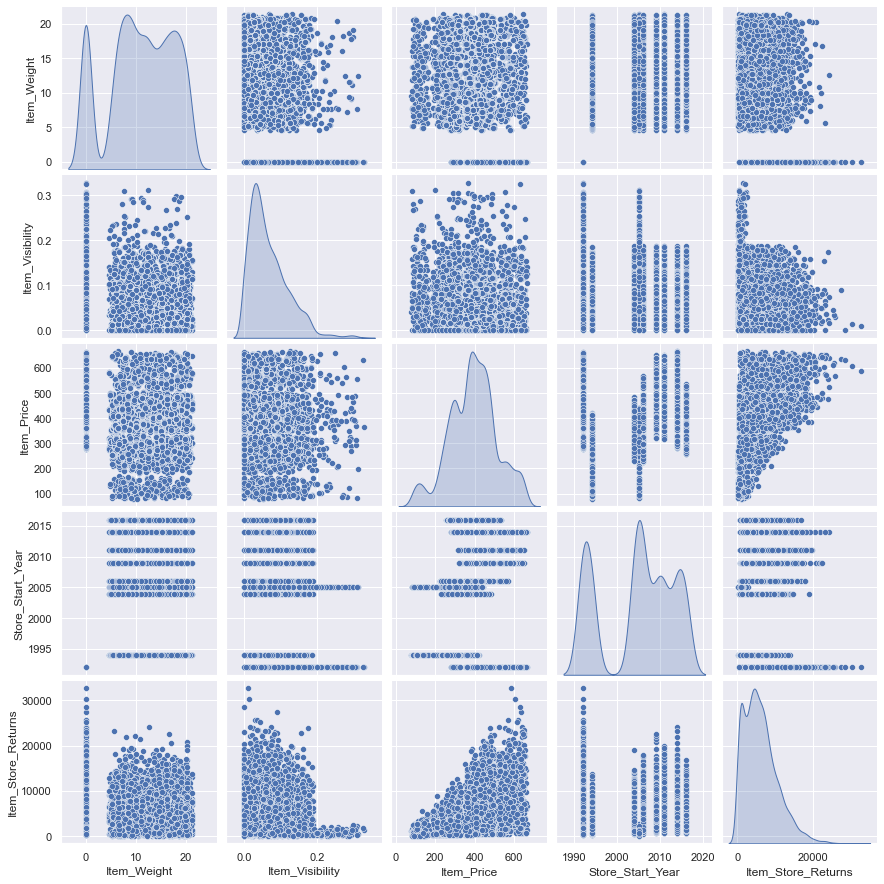

In [147]:
sns.pairplot(data = train, diag_kind="kde")

In [148]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,0,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,0,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


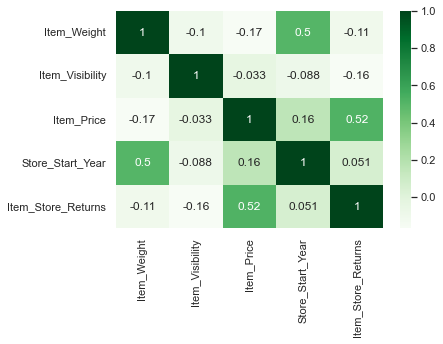

In [149]:
sns.heatmap(train[["Item_ID", "Store_ID", "Item_Store_ID", "Item_Weight", "Item_Sugar_Content", "Item_Visibility", "Item_Type", "Item_Price", "Store_Start_Year", "Store_Size", "Store_Location_Type", "Store_Type", "Store_Type", "Item_Store_Returns" ]] .corr(),
cmap = "Greens", annot = True)

plt.show()

<AxesSubplot:xlabel='Item_Store_Returns', ylabel='Item_Store_ID'>

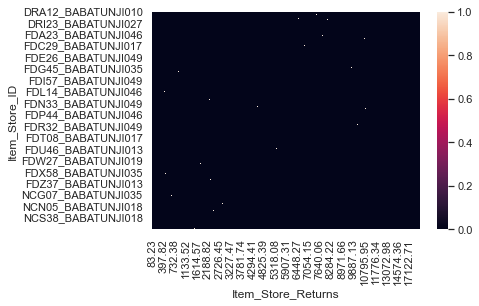

In [150]:
sns.heatmap(pd.crosstab(train.Item_Store_ID, train.Item_Store_Returns))

In [151]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,0,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,0,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


# Data Processing

In [152]:
train.isna() .sum()

Item_ID                0
Store_ID               0
Item_Store_ID          0
Item_Weight            0
Item_Sugar_Content     0
Item_Visibility        0
Item_Type              0
Item_Price             0
Store_Start_Year       0
Store_Size             0
Store_Location_Type    0
Store_Type             0
Item_Store_Returns     0
dtype: int64

In [153]:
train.info

<bound method DataFrame.info of      Item_ID      Store_ID       Item_Store_ID  Item_Weight  \
0      DRA12  BABATUNJI010  DRA12_BABATUNJI010        11.60   
1      DRA12  BABATUNJI013  DRA12_BABATUNJI013        11.60   
2      DRA12  BABATUNJI017  DRA12_BABATUNJI017        11.60   
3      DRA12  BABATUNJI018  DRA12_BABATUNJI018        11.60   
4      DRA12  BABATUNJI035  DRA12_BABATUNJI035        11.60   
...      ...           ...                 ...          ...   
4985   NCZ54  BABATUNJI019  NCZ54_BABATUNJI019         0.00   
4986   NCZ54  BABATUNJI027  NCZ54_BABATUNJI027         0.00   
4987   NCZ54  BABATUNJI045  NCZ54_BABATUNJI045        14.65   
4988   NCZ54  BABATUNJI046  NCZ54_BABATUNJI046        14.65   
4989   NCZ54  BABATUNJI049  NCZ54_BABATUNJI049        14.65   

     Item_Sugar_Content  Item_Visibility    Item_Type  Item_Price  \
0             Low Sugar         0.068535  Soft Drinks      357.54   
1             Low Sugar         0.040912  Soft Drinks      355.79   
2   

In [154]:
from sklearn.compose import ColumnTransformer

In [155]:
df_temp = train.copy()
df_temp.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,0,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,0,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [156]:
#split data into featutes and label
x = df_temp.drop("Item_Store_Returns", axis = 1)
y= df_temp["Item_Store_Returns"]


In [157]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)


In [158]:
x_train.shape, x_test.shape, y_train.shape, y_train.shape

((3992, 12), (998, 12), (3992,), (3992,))

In [159]:
pd.crosstab(train.Item_Store_ID, train.Item_Store_Returns)

Item_Store_Returns,83.23,88.22,91.55,94.88,99.87,103.20,104.86,111.52,113.19,114.85,...,23905.55,24161.88,24195.17,25182.22,25591.69,25766.46,27484.22,28612.76,30293.90,32717.41
Item_Store_ID,,,,,,,,,,,,,,,,,,,,,
DRA12_BABATUNJI010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DRA12_BABATUNJI013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DRA12_BABATUNJI017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DRA12_BABATUNJI018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DRA12_BABATUNJI035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCZ54_BABATUNJI019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCZ54_BABATUNJI027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NCZ54_BABATUNJI045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
#clf = LogisticRegression(random_state=0, max_iter=100).fit(x_train, y_train)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3992, 12), (998, 12), (3992,), (998,))

In [161]:
y_train.head()

1451     1158.49
3760    16029.14
4404     8946.69
879      4074.70
2561     2576.65
Name: Item_Store_Returns, dtype: float64

In [162]:
from sklearn.compose import ColumnTransformer 

In [163]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,0,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,0,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [164]:
df_temp = train.copy()

In [165]:
df_temp.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,0,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,0,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [166]:
y = df_temp.drop("Item_Store_Returns", axis=1)
x = df_temp["Item_Store_Returns"]

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [168]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((3992,), (998,), (3992, 12), (998, 12))

In [169]:
x_train.head()

1451     1158.49
3760    16029.14
4404     8946.69
879      4074.70
2561     2576.65
Name: Item_Store_Returns, dtype: float64

In [170]:
y_train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
1451,FDH56,BABATUNJI010,FDH56_BABATUNJI010,9.80,Normal Sugar,0.106817,Fruits and Vegetables,285.62,2005,0,Cluster 3,Grocery Store
3760,FDY28,BABATUNJI045,FDY28_BABATUNJI045,7.47,Normal Sugar,0.000000,Frozen Foods,529.55,2009,0,Cluster 2,Supermarket Type1
4404,NCL31,BABATUNJI027,NCL31_BABATUNJI027,0.00,Low Sugar,0.119699,Others,357.62,1992,Medium,Cluster 3,Supermarket Type3
879,FDD09,BABATUNJI045,FDD09_BABATUNJI045,13.50,Low Sugar,0.021540,Fruits and Vegetables,456.24,2009,0,Cluster 2,Supermarket Type1
2561,FDR12,BABATUNJI017,FDR12_BABATUNJI017,12.60,Normal Sugar,0.031713,Baking Goods,431.44,2014,0,Cluster 2,Supermarket Type1


In [171]:
import pandas as pd
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [172]:
subt = sample.groupby('Item_Store_ID')['Item_Store_Returns'].sum().reset_index()

In [179]:
# Generate predictions
subt['Item_Store_Returns'] = subt['Item_Store_ID'].apply(predict_return)

NameError: name 'predict_return' is not defined

In [177]:
predict_return.to.csv('submission.csv', index =False)

NameError: name 'predict_return' is not defined

In [187]:
# Load the train and sample submission data again
train = pd.read_csv("train.csv")
sample = pd.read_csv("SampleSubmission.csv")

# Extract test set identifiers from sample submission
# They appear to follow the format 'ItemID_StoreID'
sample['Item_ID'] = sample['Item_Store_ID'].apply(lambda x: x.split('_')[0])
sample['Store_ID'] = sample['Item_Store_ID'].apply(lambda x: x.split('_')[1])

# Let's check which columns are in the train set and use that to create a dummy test set
train_columns = train.columns.tolist()
train_columns.remove("Item_Store_Returns")

sample_features = sample.merge(train[train_columns].drop_duplicates(), on=["Item_ID", "Store_ID"], how="left")

# Display the test features to confirm we're aligned
sample_features.head()


,Item_Store_ID_x,Item_Store_Returns,Item_ID,Store_ID,Item_Store_ID_y,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59_BABATUNJI010,100,DRA59,BABATUNJI010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DRA59_BABATUNJI013,100,DRA59,BABATUNJI013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DRB01_BABATUNJI013,100,DRB01,BABATUNJI013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DRB13_BABATUNJI010,100,DRB13,BABATUNJI010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DRB13_BABATUNJI013,100,DRB13,BABATUNJI013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
